最優距離：
35566.15837942634
[15, 7, 37, 30, 43, 17, 6, 27, 5, 36, 18, 26, 16, 42, 29, 35, 45, 32, 19, 46, 20, 12, 24, 13, 22, 10, 11, 14, 39, 8, 0, 21, 2, 33, 28, 4, 47, 38, 31, 23, 9, 44, 34, 3, 25, 41, 1, 40]
執行時間：
8.192114353179932
[6107, 7265, 7392, 7545, 7509, 7462, 7573, 7541, 7608, 7762, 7732, 7555, 7611, 7280, 7352, 7248, 6807, 6426, 5900, 5185, 4483, 4706, 4307, 4612, 5199, 5468, 5989, 6347, 6271, 6898, 6734, 6101, 5530, 4608, 3177, 3082, 3023, 3484, 3245, 1633, 1112, 10, 23, 401, 675, 1916, 2233, 4985, 6107]
[669, 1268, 2244, 2801, 3239, 3590, 3716, 3981, 4458, 4595, 4723, 4819, 5184, 4899, 4506, 3779, 2993, 3173, 3561, 3258, 3369, 2674, 2322, 2035, 2182, 2606, 2873, 2683, 2135, 1885, 1453, 1110, 1424, 1198, 756, 1644, 1942, 2829, 3305, 2809, 2049, 2676, 2216, 841, 1006, 1569, 10, 140, 669]


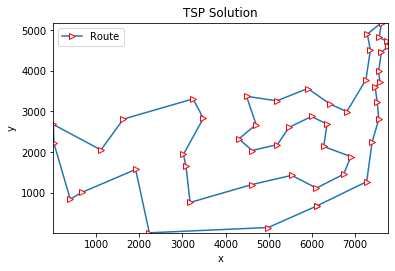

In [41]:
import math
import random
import numpy as np 
import matplotlib.pyplot as plt
import sys
import copy
import time

#初始48个城市座標
city_x = [6734,2233,5530,401,3082,7608,7573,7265,6898,1112,5468,5989,4706,4612,6347,6107,7611,7462,7732,5900,4483,6101,5199,1633,4307,675,7555,7541,3177,7352,7545,3245,6426,4608,23,7248,7762,7392,3484,6271,4985,1916,7280,7509,10,6807,5185,3023]
city_y = [1453,10,1424,841,1644,4458,3716,1268,1885,2049,2606,2873,2674,2035,2683,669,5184,3590,4723,3561,3369,1110,2182,2809,2322,1006,4819,3981,756,4506,2801,3305,3173,1198,2216,3779,4595,2244,2829,2135,140,1569,4899,3239,2676,2993,3258,1942]
#城市數量
n = 48
distance = [[0 for col in range(n)] for raw in range(n)]

#禁忌表
tabu_list = []
tabu_time = []
#当前禁忌对象数量
current_tabu_num = 0
#禁忌list
tabu_limit = 50
#候選集
candidate = [[0 for col in range(n)] for raw in range(200)]
candidate_distance = [0 for col in range(200)]
#最佳路径以及最佳距离
best_route = []
best_distance = sys.maxsize
current_route = []
current_distance = 0.0

def greedy():
    #通过贪婪算法确定初始r值，也就是初始信息素浓度       
    sum = 0.0
    #必须实例化一个一个赋值，不然只是把地址赋值，牵一发而动全身
    dis = [[0 for col in range(n)] for raw in range(n)]
    for i in range(n):
        for j in range(n):
            dis[i][j] = distance[i][j]
                
    visited = []
        #进行贪婪选择——每次都选择距离最近的
    id = 0
    for i in range(n):
        for j in range(n):
            dis[j][id] = sys.maxsize
        minvalue = min(dis[id])
        if i != 29:
            sum += minvalue
        visited.append(id)
        id = dis[id].index(minvalue)
    sum += distance[0][visited[n-1]]
    return visited


#构建初始参考距离矩阵
def getdistance():
    for i in range(n):
        for j in range(n):
            x = pow(city_x[i] - city_x[j], 2)
            y = pow(city_y[i] - city_y[j], 2)
            distance[i][j] = pow(x + y, 0.5)
    for i in range(n):
        for j in range(n):
            if distance[i][j] == 0:
                distance[i][j] = sys.maxsize
                
#计算总距离
def cacl_best(rou):
    sumdis = 0.0
    for i in range(n-1):
        sumdis += distance[rou[i]][rou[i+1]]
    sumdis += distance[rou[n-1]][rou[0]]     
    return sumdis

#初始设置
def setup():
    global best_route
    global best_distance
    global tabu_time
    global current_tabu_num
    global current_distance
    global current_route
    global tabu_list
    #得到初始解以及初始距离
    #current_route = random.sample(range(0, n), n) 
    current_route = greedy()
    best_route = copy.copy(current_route)
    #函数内部修改全局变量的值
    current_distance = cacl_best(current_route)
    best_distance = current_distance
    
    #置禁忌表为空
    tabu_list.clear()
    tabu_time.clear()
    current_tabu_num = 0

#交换数组两个元素
def exchange(index1, index2, arr):
    current_list = copy.copy(arr)
    current = current_list[index1]
    current_list[index1] = current_list[index2]
    current_list[index2] = current
    return current_list
    
    
#得到邻域 候选解
def get_candidate():
    global best_route
    global best_distance
    global current_tabu_num
    global current_distance
    global current_route
    global tabu_list
    #存储两个交换的位置
    exchange_position = []
    temp = 0
    #随机选取邻域
    while True:
        current = random.sample(range(0, n), 2)
        #print(current)
        if current not in exchange_position:
            exchange_position.append(current)
            candidate[temp] = exchange(current[0], current[1], current_route)
            if candidate[temp] not in tabu_list:
                candidate_distance[temp] = cacl_best(candidate[temp])
                temp += 1
            if temp >= 200:
                break
            
    
    #得到候选解中的最优解
    candidate_best = min(candidate_distance)
    best_index = candidate_distance.index(candidate_best)
    
    
    current_distance = candidate_best
    current_route = copy.copy(candidate[best_index])
    #与当前最优解进行比较 
    
    if current_distance < best_distance:
        best_distance = current_distance
        best_route = copy.copy(current_route)
    
    #加入禁忌表
    tabu_list.append(candidate[best_index])
    tabu_time.append(tabu_limit)
    current_tabu_num += 1    
    
#更新禁忌表以及禁忌期限
def update_tabu():
    global current_tabu_num
    global tabu_time
    global tabu_list
    
    del_num = 0
    temp = [0 for col in range(n)]
    #更新步长
    tabu_time = [x-1 for x in tabu_time]
    #如果达到期限，释放
    for i in range(current_tabu_num):
        if tabu_time[i] == 0:
            del_num += 1
            tabu_list[i] = temp
           
    current_tabu_num -= del_num        
    while 0 in tabu_time:
        tabu_time.remove(0)
    
    while temp in tabu_list:
        tabu_list.remove(temp)
    
    
    
def draw():
    result_x = [0 for col in range(n+1)]
    result_y = [0 for col in range(n+1)]
    
    for i in range(n):
        result_x[i] = city_x[best_route[i]]
        result_y[i] = city_y[best_route[i]]
    result_x[n] = result_x[0]
    result_y[n] = result_y[0]
    print(result_x)
    print(result_y)
    #plt.xlim(0, 100)  # 限定横轴的范围
    #plt.ylim(0, 100)  # 限定纵轴的范围
    plt.plot(result_x, result_y, marker='>', mec='r', mfc='w',label=u'Route')
    plt.legend()  # 让图例生效
    plt.margins(0)
    plt.subplots_adjust(bottom=0.15)
    plt.xlabel(u"x") #X轴标签
    plt.ylabel(u"y") #Y轴标签
    plt.title("TSP Solution") #标题
    
    plt.show()
    plt.close(0)  
    
                
def solve():
    getdistance()
    runtime = 1000
    #runtime = int(input("迭代次數："))
    start_time = time.time()
    setup()
    for rt in range(runtime):

        get_candidate()
        update_tabu()
    exec_time =  time.time() - start_time
    
    #print("當前距离：")
    #print(current_distance)
    #print(current_route)
    print("最優距離：") 
    print(best_distance)   
    print(best_route)
    print("執行時間：") 
    print(exec_time)
    draw()    
    
if __name__=="__main__":
    solve()
    